In [ ]:
!pip install plotly-express==0.4.1

# Netflix Movies and TV Shows
***

#### import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings("ignore")

### Load Data

In [ ]:
# 캐글 넷플릭스 데이터
path = '/content/drive/MyDrive/해커톤 1/넷플릭스/'
path_1 = path + 'netflix_titles.csv'
netflix = pd.read_csv(path_1)
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# 다른 데이터들 불러오기
# 넷플릭스 오리지널
path_2 = path + 'NetflixOriginals.csv'
netflix_original = pd.read_csv(path_2, encoding='latin1')

#넷플릭스 오리지널 두번째 데이터셋
path_3= path + 'Netflix Original Content Dataset.csv'
netflix_original_2 = pd.read_csv(path_3, encoding='latin1')

# 넷플릭스 구독료
path_4 = path + 'Netflix subscription fee Dec-2021.csv'
netflix_cost = pd.read_csv(path_4, encoding='latin1')

# 넷플릭스 주가
path_5 = path + 'NFLX_stock_2002to2021.csv'
netflix_stock = pd.read_csv(path_5, index_col='Date', parse_dates=True, encoding='latin1')

# 디즈니플러스 데이터
path_6 = path + 'disney_plus_titles.csv'
disney = pd.read_csv(path_6)

# 디즈니플러스 주가
path_7 = path + 'DIS_stock_2019to2022.csv'
disney_stock = pd.read_csv(path_7, index_col='Date', parse_dates=True, encoding='latin1')
disney_stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-11,114.040001,115.000000,114.029999,114.750000,113.364548,6952700
2019-03-12,114.720001,115.300003,114.040001,114.730003,113.344795,9920300
2019-03-13,114.839996,114.849998,113.720001,114.089996,112.712509,17994500
2019-03-14,114.120003,114.769997,113.930000,114.480003,113.097816,17409600
2019-03-15,114.500000,115.480003,113.680000,114.959999,113.572014,14932700


In [ ]:
netflix.shape

(8807, 12)

In [ ]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# 결측치가 있는 column이 있는지 확인

netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64



* 5개의 column에서 결측치가 발견



## 시각화

### Content Type

In [ ]:
col = "type"
grouped = netflix[col].value_counts().reset_index() # type의 unique value들을 count 하고, 인덱스를 reset 시킴.
grouped = grouped.rename(columns = {col : "count", "index" : col})

grouped

,type,count
0,Movie,6131
1,TV Show,2676


In [ ]:
## Content Type을 시각화

trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=['#221f1f', '#b20710']))
layout = go.Layout(title="", height=400, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

### 국가별

#### country count 셋업

In [ ]:
country_count = netflix.copy() # netflix 데이터프레임을 copy하고 country_count에 저장
country_count = pd.concat([country_count, netflix["country"].str.split(",", expand = True)], axis = 1)
country_count

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,2,3,4,5,6,7,8,9,10,11
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,...,None,None,None,None,None,None,None,None,None,None
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,...,None,None,None,None,None,None,None,None,None,None
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,...,None,None,None,None,None,None,None,None,None,None
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,...,None,None,None,None,None,None,None,None,None,None
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,...,None,None,None,None,None,None,None,None,None,None
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,...,None,None,None,None,None,None,None,None,None,None
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,...,None,None,None,None,None,None,None,None,None,None
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
# pandas의 melt를 사용해서 country_count를 구성
# id_vars = ["type", "title"] -> 기준
# value_vars = range(12) -> variable 0 ~ 11
# value_name = "country"

country_count = country_count.melt(id_vars = ["type", "title"], value_vars = range(12), value_name = "country")
country_count = country_count[country_count["country"].notna()] # 결측치가 아닌 값
country_count

,type,title,variable,country
0,Movie,Dick Johnson Is Dead,0,United States
1,TV Show,Blood & Water,0,South Africa
4,TV Show,Kota Factory,0,India
7,Movie,Sankofa,0,United States
8,TV Show,The Great British Baking Show,0,United Kingdom
...,...,...,...,...
78859,Movie,The Look of Silence,8,Germany
85496,Movie,Barbecue,9,Sweden
87666,Movie,The Look of Silence,9,Netherlands
94303,Movie,Barbecue,10,United States


#### 넷플릭스에 작품을 업로드한 국가의 수

In [ ]:
# 국가의 수

country_count["country"].nunique()

197

* **197개국**의 작품이 **넷플릭스**에 업로드되어 있다.

#### 띄어쓰기 삭제

In [ ]:
# 국가별 작품 수 Top 10

country_count["country"].value_counts()[:10]

United States     3211
India             1008
United Kingdom     628
 United States     479
Canada             271
Japan              259
France             212
South Korea        211
Spain              181
 France            181
Name: country, dtype: int64

* United States가 두 개 있는 것을 확인
* 하나로 합쳐 줌

In [ ]:
# 두 번째에 있는 United States와 10번 째의 France를 보면 띄어쓰기가 되어있다. 없애주자.

country_count["country"] = country_count["country"].str.strip()

In [ ]:
# 국가별 작품 수 Top 10

country_count["country"].value_counts()[:10]

United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
Name: country, dtype: int64

#### 지도 셋업

In [ ]:
# 지도

country_codes = {'afghanistan': 'AFG',
 'albania': 'ALB',
 'algeria': 'DZA',
 'american samoa': 'ASM',
 'andorra': 'AND',
 'angola': 'AGO',
 'anguilla': 'AIA',
 'antigua and barbuda': 'ATG',
 'argentina': 'ARG',
 'armenia': 'ARM',
 'aruba': 'ABW',
 'australia': 'AUS',
 'austria': 'AUT',
 'azerbaijan': 'AZE',
 'bahamas': 'BHM',
 'bahrain': 'BHR',
 'bangladesh': 'BGD',
 'barbados': 'BRB',
 'belarus': 'BLR',
 'belgium': 'BEL',
 'belize': 'BLZ',
 'benin': 'BEN',
 'bermuda': 'BMU',
 'bhutan': 'BTN',
 'bolivia': 'BOL',
 'bosnia and herzegovina': 'BIH',
 'botswana': 'BWA',
 'brazil': 'BRA',
 'british virgin islands': 'VGB',
 'brunei': 'BRN',
 'bulgaria': 'BGR',
 'burkina faso': 'BFA',
 'burma': 'MMR',
 'burundi': 'BDI',
 'cabo verde': 'CPV',
 'cambodia': 'KHM',
 'cameroon': 'CMR',
 'canada': 'CAN',
 'cayman islands': 'CYM',
 'central african republic': 'CAF',
 'chad': 'TCD',
 'chile': 'CHL',
 'china': 'CHN',
 'colombia': 'COL',
 'comoros': 'COM',
 'congo democratic': 'COD',
 'Congo republic': 'COG',
 'cook islands': 'COK',
 'costa rica': 'CRI',
 "cote d'ivoire": 'CIV',
 'croatia': 'HRV',
 'cuba': 'CUB',
 'curacao': 'CUW',
 'cyprus': 'CYP',
 'czech republic': 'CZE',
 'denmark': 'DNK',
 'djibouti': 'DJI',
 'dominica': 'DMA',
 'dominican republic': 'DOM',
 'ecuador': 'ECU',
 'egypt': 'EGY',
 'el salvador': 'SLV',
 'equatorial guinea': 'GNQ',
 'eritrea': 'ERI',
 'estonia': 'EST',
 'ethiopia': 'ETH',
 'falkland islands': 'FLK',
 'faroe islands': 'FRO',
 'fiji': 'FJI',
 'finland': 'FIN',
 'france': 'FRA',
 'french polynesia': 'PYF',
 'gabon': 'GAB',
 'gambia, the': 'GMB',
 'georgia': 'GEO',
 'germany': 'DEU',
 'ghana': 'GHA',
 'gibraltar': 'GIB',
 'greece': 'GRC',
 'greenland': 'GRL',
 'grenada': 'GRD',
 'guam': 'GUM',
 'guatemala': 'GTM',
 'guernsey': 'GGY',
 'guinea-bissau': 'GNB',
 'guinea': 'GIN',
 'guyana': 'GUY',
 'haiti': 'HTI',
 'honduras': 'HND',
 'hong kong': 'HKG',
 'hungary': 'HUN',
 'iceland': 'ISL',
 'india': 'IND',
 'indonesia': 'IDN',
 'iran': 'IRN',
 'iraq': 'IRQ',
 'ireland': 'IRL',
 'isle of man': 'IMN',
 'israel': 'ISR',
 'italy': 'ITA',
 'jamaica': 'JAM',
 'japan': 'JPN',
 'jersey': 'JEY',
 'jordan': 'JOR',
 'kazakhstan': 'KAZ',
 'kenya': 'KEN',
 'kiribati': 'KIR',
 'north korea': 'PRK',
 'south korea': 'KOR',
 'kosovo': 'KSV',
 'kuwait': 'KWT',
 'kyrgyzstan': 'KGZ',
 'laos': 'LAO',
 'latvia': 'LVA',
 'lebanon': 'LBN',
 'lesotho': 'LSO',
 'liberia': 'LBR',
 'libya': 'LBY',
 'liechtenstein': 'LIE',
 'lithuania': 'LTU',
 'luxembourg': 'LUX',
 'macau': 'MAC',
 'macedonia': 'MKD',
 'madagascar': 'MDG',
 'malawi': 'MWI',
 'malaysia': 'MYS',
 'maldives': 'MDV',
 'mali': 'MLI',
 'malta': 'MLT',
 'marshall islands': 'MHL',
 'mauritania': 'MRT',
 'mauritius': 'MUS',
 'mexico': 'MEX',
 'micronesia': 'FSM',
 'moldova': 'MDA',
 'monaco': 'MCO',
 'mongolia': 'MNG',
 'montenegro': 'MNE',
 'morocco': 'MAR',
 'mozambique': 'MOZ',
 'namibia': 'NAM',
 'nepal': 'NPL',
 'netherlands': 'NLD',
 'new caledonia': 'NCL',
 'new zealand': 'NZL',
 'nicaragua': 'NIC',
 'nigeria': 'NGA',
 'niger': 'NER',
 'niue': 'NIU',
 'northern mariana islands': 'MNP',
 'norway': 'NOR',
 'oman': 'OMN',
 'pakistan': 'PAK',
 'palau': 'PLW',
 'panama': 'PAN',
 'papua new guinea': 'PNG',
 'paraguay': 'PRY',
 'peru': 'PER',
 'philippines': 'PHL',
 'poland': 'POL',
 'portugal': 'PRT',
 'puerto rico': 'PRI',
 'qatar': 'QAT',
 'romania': 'ROU',
 'russia': 'RUS',
 'rwanda': 'RWA',
 'saint kitts and nevis': 'KNA',
 'saint lucia': 'LCA',
 'saint martin': 'MAF',
 'saint pierre and miquelon': 'SPM',
 'saint vincent and the grenadines': 'VCT',
 'samoa': 'WSM',
 'san marino': 'SMR',
 'sao tome and principe': 'STP',
 'saudi arabia': 'SAU',
 'senegal': 'SEN',
 'serbia': 'SRB',
 'seychelles': 'SYC',
 'sierra leone': 'SLE',
 'singapore': 'SGP',
 'sint maarten': 'SXM',
 'slovakia': 'SVK',
 'slovenia': 'SVN',
 'solomon islands': 'SLB',
 'somalia': 'SOM',
 'south africa': 'ZAF',
 'south sudan': 'SSD',
 'spain': 'ESP',
 'sri lanka': 'LKA',
 'sudan': 'SDN',
 'suriname': 'SUR',
 'swaziland': 'SWZ',
 'sweden': 'SWE',
 'switzerland': 'CHE',
 'syria': 'SYR',
 'taiwan': 'TWN',
 'tajikistan': 'TJK',
 'tanzania': 'TZA',
 'thailand': 'THA',
 'timor-leste': 'TLS',
 'togo': 'TGO',
 'tonga': 'TON',
 'trinidad and tobago': 'TTO',
 'tunisia': 'TUN',
 'turkey': 'TUR',
 'turkmenistan': 'TKM',
 'tuvalu': 'TUV',
 'uganda': 'UGA',
 'ukraine': 'UKR',
 'united arab emirates': 'ARE',
 'united kingdom': 'GBR',
 'united states': 'USA',
 'uruguay': 'URY',
 'uzbekistan': 'UZB',
 'vanuatu': 'VUT',
 'venezuela': 'VEN',
 'vietnam': 'VNM',
 'virgin islands': 'VGB',
 'west bank': 'WBG',
 'yemen': 'YEM',
 'zambia': 'ZMB',
 'zimbabwe': 'ZWE'}

## countries 
from collections import Counter

colorscale = ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
    "#85bcdb", "#6baed6", "#57a0ce", "#4292c6", "#3082be", "#2171b5", "#1361a9",
    "#08519c", "#0b4083", "#08306b"
]
    
def geoplot(ddf):
    country_with_code, country = {}, {}
    shows_countries = ", ".join(ddf['country'].dropna()).split(", ")
    for c,v in dict(Counter(shows_countries)).items():
        code = ""
        if c.lower() in country_codes:
            code = country_codes[c.lower()]
        country_with_code[code] = v
        country[c] = v

    data = [dict(
            type = 'choropleth',
            locations = list(country_with_code.keys()),
            z = list(country_with_code.values()),
            colorscale = [[0,"rgb(5, 10, 172)"],[0.65,"rgb(40, 60, 190)"],[0.75,"rgb(70, 100, 245)"],\
                        [0.80,"rgb(90, 120, 245)"],[0.9,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
            autocolorscale = False,
            reversescale = True,
            marker = dict(
                line = dict (
                    color = 'gray',
                    width = 0.5
                ) ),
            colorbar = dict(
                autotick = False,
                title = ''),
          ) ]

    layout = dict(
        title = '',
        geo = dict(
            showframe = False,
            showcoastlines = False,
            projection = dict(
                type = 'Mercator'
            )
        )
    )

    fig = dict( data=data, layout=layout )
    iplot( fig, validate=False, filename='d3-world-map' )
    return country

#country_vals = geoplot(netflix)

#### 지도: 국가별 작품 수(넷플릭스)

In [ ]:
country_vals = geoplot(netflix)

#### 국가별 작품 수(넷플릭스)

In [ ]:
tabs = Counter(country_vals).most_common(25)

labels = [_[0] for _ in tabs][::-1]
values = [_[1] for _ in tabs][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="", marker=dict(color="#b20710"))

data = [trace1]
layout = go.Layout(title="국가별 작품 수", height=700, legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

* 넷플릭스에 업로드된 작품의 수는 미국이 압도적으로 많음을 확인할 수 있다.
* 미국 작품의 수가 많은 이유로는 먼저 넷플릭스 회사 자체가 미국 회사인 이유가 있을 것이다.
* 또한 할리우드 작품과 같은 주목 받는 많은 컨텐츠들이 미국에서 만들어지는 것도 한몫 한다고 생각한다.
* 미국 다음으로는 인도, 영국, 캐나다, 프랑스 등이 있다.

In [ ]:
# 국가별 작품수 Movie & TV Show

px.histogram(country_count, "country", color = "type").update_xaxes(categoryorder = "total descending")

### 날짜별

#### release year 시각화

In [ ]:
# release_year column 시각화

px.histogram(netflix, x = "release_year", color = "release_year")

* **release year**은 실제 작품이 출시된 날짜를 의미한다.
* 2018년에 출시된 작품이 가장 많이 등록되어 있다.
* 최근에 출시된 작품들이 주를 이루고 있음을 확인할 수 있다.
* 드물게 고전 영화들도 있다.

#### date_added column을 datetime 자료형으로 변환

In [ ]:
# date_added column을 datetime 자료형으로 변환

netflix['date_added'] = pd.to_datetime(netflix['date_added'])
netflix.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [ ]:
# date_added column이 잘 바뀌었는지 샘플 확인

netflix.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4522,s4523,Movie,22 July,Paul Greengrass,"Anders Danielsen Lie, Jon Øigarden, Jonas Stra...","Norway, Iceland, United States",2018-10-10,2018,R,144 min,"Dramas, Thrillers","After devastating terror attacks in Norway, a ..."


#### date added

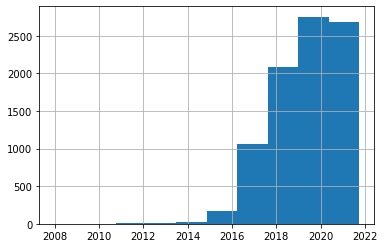

In [ ]:
# 넷플릭스에 추가된 날짜

netflix["date_added"].hist()

* **date added**는 작품이 넷플릭스에 추가된 날짜를 의미한다.
* 최근 5년 간 대부분의 작품이 넷플릭스에 업로드 됨을 확인할 수 있다.

#### 'year_added', 'month_added', 'day_added' column 추가

In [ ]:
# 'year_added', 'month_added', 'day_added' column을 새로 만들어 준다.

netflix['year_added'] = netflix['date_added'].dt.year
netflix['month_added'] = netflix['date_added'].dt.month
netflix['day_added'] = netflix['date_added'].dt.day

#### 연도별 작품 수 셋업

In [ ]:
# 넷플릭스에 추가된 연도별 작품 수

d1 = netflix[netflix["type"] == "TV Show"]
d2 = netflix[netflix["type"] == "Movie"]

col = "year_added"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#b20710"))
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#221f1f"))
data = [trace1, trace2]
layout = go.Layout(title="연도별 작품 수 증가 추이", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
#fig.show()

#### 넷플릭스에 추가된 연도별 작품 수

In [ ]:
fig.show()

* 2019년에 가장 많이 업로드 됨을 알 수 있다.
* 넷플릭스가 많이 상용화되면서 지속적으로 넷플릭스에 업로드되는 작품 수가 증가하는 추세이다.
* 2021년 전체의 데이터가 아니라 2021년에 업로드 된 작품 수가 줄어드는 것처럼 보이지만 전년도보다 늘었을 것으로 기대된다.

#### 월별 작품 수 셋업

In [ ]:
# 넷플릭스에 추가된 월별 작품 수

d1 = netflix[netflix["type"] == "TV Show"]
d2 = netflix[netflix["type"] == "Movie"]

col = 'month_added'

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2 = vc2.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#b20710"))
trace2 = go.Bar(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#221f1f"))
data = [trace1, trace2]
layout = go.Layout(title="월별 작품 수 증가 추이", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
#fig.show()

#### 넷플릭스에 추가된 월별 작품 수

In [ ]:
fig.show()

* 월별 작품 업로드 수의 차이는 크게 없는 것으로 보인다.

#### 일별 작품 수 셋업

In [ ]:
# 넷플릭스에 추가된 일별 작품 수

d1 = netflix[netflix["type"] == "TV Show"]
d2 = netflix[netflix["type"] == "Movie"]

col = 'day_added'

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2 = vc2.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#b20710"))
trace2 = go.Bar(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#221f1f"))
data = [trace1, trace2]
layout = go.Layout(title="일별 작품 수 증가 추이", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
#fig.show()

#### 넷플릭스에 추가된 일별 작품 수

In [ ]:
fig.show()

* 매월 1일에 작품이 가장 많이 업로드 된 것을 알 수 있다.
* 매월 1일에 새롭게 볼만한 작품을 등록해서 구독자를 잡으려는 전략이 아닐까 싶다.
* 다음으로는 15일이 많고 나머지의 증가 추이는 비슷한 것을 파악할 수 있다.

### 등급별

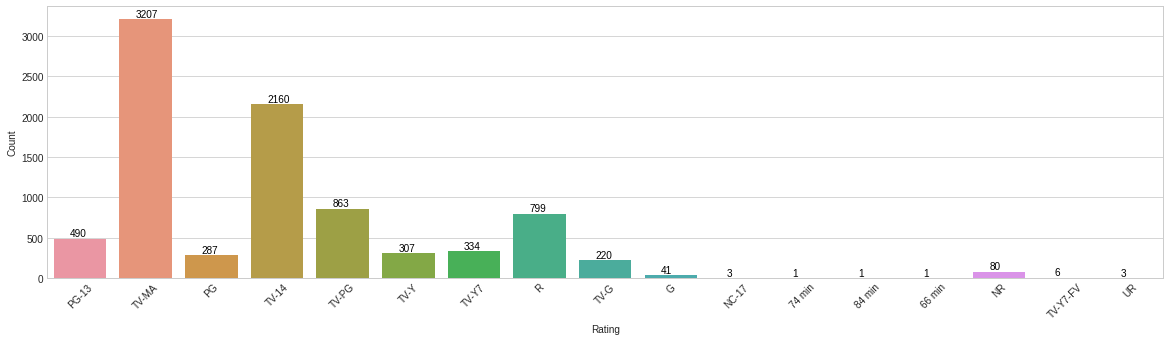

In [ ]:
# 등급별 작품 수

plt.figure(figsize = (20, 5))
plt.style.use('seaborn-whitegrid')
ax = sns.countplot(x = 'rating', data = netflix)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

* **rating column**에 **duration column**의 값인 74min, 84min, 66min이 있다.
* 74min, 84min, 66min 값을 없애고 시각화한다.

#### 등급별 셋업

In [ ]:
# 결측치가 많은 column의 결측치를 No data로 채워줌

netflix['country'].replace(np.nan, 'No Data',inplace  = True)
netflix['cast'].replace(np.nan, 'No Data',inplace  = True)
netflix['director'].replace(np.nan, 'No Data',inplace  = True)

# 나머지 결측치들을 제거

netflix.dropna(inplace=True)

# 중복값 제거

netflix.drop_duplicates(inplace= True)

In [ ]:
# 등급별 작품 수(Content Type)

d1 = netflix[netflix["type"] == "TV Show"]
d2 = netflix[netflix["type"] == "Movie"]

col = "rating"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2 = vc2.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#b20710"))
trace2 = go.Bar(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#221f1f"))
data = [trace1, trace2]
layout = go.Layout(title="등급별 작품 수", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
#fig.show()

#### 디즈니플러스 등급별(Movie & TV Show) 작품 수

In [ ]:
fig.show()

* TV-14는 **청소년(16세 이상)** 등급
* TV-MA, NC-17, NR, R은 **성인(18세 이상)** 등급
* TV-MA, TV-14, R 등급이 대부분을 차지한다.
* **넷플릭스**의 **타겟층**은 <mark>성인</mark>임을 알 수 있다.

# Disney Plus

### Load Data

In [ ]:
disney.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [ ]:
disney.shape

(1450, 12)

In [ ]:
disney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [ ]:
# 결측치가 있는 column이 있는지 확인

disney.isnull().sum()

show_id           0
type              0
title             0
director        473
cast            190
country         219
date_added        3
release_year      0
rating            3
duration          0
listed_in         0
description       0
dtype: int64



* 5개의 column에서 결측치가 발견



## 시각화

### Content Type

In [ ]:
col = "type"
grouped = disney[col].value_counts().reset_index() # type의 unique value들을 count 하고, 인덱스를 reset 시킴.
grouped = grouped.rename(columns = {col : "count", "index" : col})

grouped

,type,count
0,Movie,1052
1,TV Show,398


In [ ]:
## Content Type을 시각화

trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=['#08306b', '#9ecae1']))
layout = go.Layout(title="", height=400, legend=dict(x=0.1, y=1.1))
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

### 국가별

#### country count 셋업

In [ ]:
country_count = disney.copy()
country_count = pd.concat([country_count, disney["country"].str.split(",", expand = True)], axis = 1)
country_count

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,5,6,7,8,9,10,11,12,13,14
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,s1446,Movie,X-Men Origins: Wolverine,Gavin Hood,"Hugh Jackman, Liev Schreiber, Danny Huston, wi...","United States, United Kingdom","June 4, 2021",2009,PG-13,108 min,...,None,None,None,None,None,None,None,None,None,None
1446,s1447,Movie,Night at the Museum: Battle of the Smithsonian,Shawn Levy,"Ben Stiller, Amy Adams, Owen Wilson, Hank Azar...","United States, Canada","April 2, 2021",2009,PG,106 min,...,None,None,None,None,None,None,None,None,None,None
1447,s1448,Movie,Eddie the Eagle,Dexter Fletcher,"Tom Costello, Jo Hartley, Keith Allen, Dickon ...","United Kingdom, Germany, United States","December 18, 2020",2016,PG-13,107 min,...,None,None,None,None,None,None,None,None,None,None
1448,s1449,Movie,Bend It Like Beckham,Gurinder Chadha,"Parminder Nagra, Keira Knightley, Jonathan Rhy...","United Kingdom, Germany, United States","September 18, 2020",2003,PG-13,112 min,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
country_count = country_count.melt(id_vars = ["type", "title"], value_vars = range(12), value_name = "country")
country_count = country_count[country_count["country"].notna()]
country_count

,type,title,variable,country
2,Movie,Ice Age: A Mammoth Christmas,0,United States
5,Movie,Becoming Cousteau,0,United States
7,TV Show,Port Protection Alaska,0,United States
8,TV Show,Secrets of the Zoo: Tampa,0,United States
9,Movie,A Muppets Christmas: Letters To Santa,0,United States
...,...,...,...,...
13807,TV Show,Bonkers,9,Taiwan
14146,Movie,Mulan II,9,China
15257,TV Show,Bonkers,10,Philippines
15596,Movie,Mulan II,10,India


#### 디즈니플러스에 작품을 업로드한 국가의 수

In [ ]:
# 국가의 수

country_count["country"].nunique()

57

* **44개국**의 작품이 **디즈니플러스**에 업로드되어 있다.

#### 띄어쓰기 삭제

In [ ]:
# 국가별 작품 수 Top 10

country_count["country"].value_counts()[:10]

United States      1121
 United States       63
 Canada              51
 United Kingdom      51
United Kingdom       50
Canada               26
 Australia           19
 South Korea         12
 France              12
 Japan               10
Name: country, dtype: int64

* United States가 두 개 있는 것을 확인
* 하나로 합쳐 줌

In [ ]:
# 위의 country를 보면 띄어쓰기가 되어있다. 없애주자.

country_count["country"] = country_count["country"].str.strip()

In [ ]:
# 국가별 작품 수 Top 10

country_count["country"].value_counts()[:10]

United States     1184
United Kingdom     101
Canada              77
Australia           23
France              22
South Korea         13
China               10
Japan               10
Germany              9
Ireland              8
Name: country, dtype: int64

#### 지도 셋업

In [ ]:
# 지도

country_codes = {'afghanistan': 'AFG',
 'albania': 'ALB',
 'algeria': 'DZA',
 'american samoa': 'ASM',
 'andorra': 'AND',
 'angola': 'AGO',
 'anguilla': 'AIA',
 'antigua and barbuda': 'ATG',
 'argentina': 'ARG',
 'armenia': 'ARM',
 'aruba': 'ABW',
 'australia': 'AUS',
 'austria': 'AUT',
 'azerbaijan': 'AZE',
 'bahamas': 'BHM',
 'bahrain': 'BHR',
 'bangladesh': 'BGD',
 'barbados': 'BRB',
 'belarus': 'BLR',
 'belgium': 'BEL',
 'belize': 'BLZ',
 'benin': 'BEN',
 'bermuda': 'BMU',
 'bhutan': 'BTN',
 'bolivia': 'BOL',
 'bosnia and herzegovina': 'BIH',
 'botswana': 'BWA',
 'brazil': 'BRA',
 'british virgin islands': 'VGB',
 'brunei': 'BRN',
 'bulgaria': 'BGR',
 'burkina faso': 'BFA',
 'burma': 'MMR',
 'burundi': 'BDI',
 'cabo verde': 'CPV',
 'cambodia': 'KHM',
 'cameroon': 'CMR',
 'canada': 'CAN',
 'cayman islands': 'CYM',
 'central african republic': 'CAF',
 'chad': 'TCD',
 'chile': 'CHL',
 'china': 'CHN',
 'colombia': 'COL',
 'comoros': 'COM',
 'congo democratic': 'COD',
 'Congo republic': 'COG',
 'cook islands': 'COK',
 'costa rica': 'CRI',
 "cote d'ivoire": 'CIV',
 'croatia': 'HRV',
 'cuba': 'CUB',
 'curacao': 'CUW',
 'cyprus': 'CYP',
 'czech republic': 'CZE',
 'denmark': 'DNK',
 'djibouti': 'DJI',
 'dominica': 'DMA',
 'dominican republic': 'DOM',
 'ecuador': 'ECU',
 'egypt': 'EGY',
 'el salvador': 'SLV',
 'equatorial guinea': 'GNQ',
 'eritrea': 'ERI',
 'estonia': 'EST',
 'ethiopia': 'ETH',
 'falkland islands': 'FLK',
 'faroe islands': 'FRO',
 'fiji': 'FJI',
 'finland': 'FIN',
 'france': 'FRA',
 'french polynesia': 'PYF',
 'gabon': 'GAB',
 'gambia, the': 'GMB',
 'georgia': 'GEO',
 'germany': 'DEU',
 'ghana': 'GHA',
 'gibraltar': 'GIB',
 'greece': 'GRC',
 'greenland': 'GRL',
 'grenada': 'GRD',
 'guam': 'GUM',
 'guatemala': 'GTM',
 'guernsey': 'GGY',
 'guinea-bissau': 'GNB',
 'guinea': 'GIN',
 'guyana': 'GUY',
 'haiti': 'HTI',
 'honduras': 'HND',
 'hong kong': 'HKG',
 'hungary': 'HUN',
 'iceland': 'ISL',
 'india': 'IND',
 'indonesia': 'IDN',
 'iran': 'IRN',
 'iraq': 'IRQ',
 'ireland': 'IRL',
 'isle of man': 'IMN',
 'israel': 'ISR',
 'italy': 'ITA',
 'jamaica': 'JAM',
 'japan': 'JPN',
 'jersey': 'JEY',
 'jordan': 'JOR',
 'kazakhstan': 'KAZ',
 'kenya': 'KEN',
 'kiribati': 'KIR',
 'north korea': 'PRK',
 'south korea': 'KOR',
 'kosovo': 'KSV',
 'kuwait': 'KWT',
 'kyrgyzstan': 'KGZ',
 'laos': 'LAO',
 'latvia': 'LVA',
 'lebanon': 'LBN',
 'lesotho': 'LSO',
 'liberia': 'LBR',
 'libya': 'LBY',
 'liechtenstein': 'LIE',
 'lithuania': 'LTU',
 'luxembourg': 'LUX',
 'macau': 'MAC',
 'macedonia': 'MKD',
 'madagascar': 'MDG',
 'malawi': 'MWI',
 'malaysia': 'MYS',
 'maldives': 'MDV',
 'mali': 'MLI',
 'malta': 'MLT',
 'marshall islands': 'MHL',
 'mauritania': 'MRT',
 'mauritius': 'MUS',
 'mexico': 'MEX',
 'micronesia': 'FSM',
 'moldova': 'MDA',
 'monaco': 'MCO',
 'mongolia': 'MNG',
 'montenegro': 'MNE',
 'morocco': 'MAR',
 'mozambique': 'MOZ',
 'namibia': 'NAM',
 'nepal': 'NPL',
 'netherlands': 'NLD',
 'new caledonia': 'NCL',
 'new zealand': 'NZL',
 'nicaragua': 'NIC',
 'nigeria': 'NGA',
 'niger': 'NER',
 'niue': 'NIU',
 'northern mariana islands': 'MNP',
 'norway': 'NOR',
 'oman': 'OMN',
 'pakistan': 'PAK',
 'palau': 'PLW',
 'panama': 'PAN',
 'papua new guinea': 'PNG',
 'paraguay': 'PRY',
 'peru': 'PER',
 'philippines': 'PHL',
 'poland': 'POL',
 'portugal': 'PRT',
 'puerto rico': 'PRI',
 'qatar': 'QAT',
 'romania': 'ROU',
 'russia': 'RUS',
 'rwanda': 'RWA',
 'saint kitts and nevis': 'KNA',
 'saint lucia': 'LCA',
 'saint martin': 'MAF',
 'saint pierre and miquelon': 'SPM',
 'saint vincent and the grenadines': 'VCT',
 'samoa': 'WSM',
 'san marino': 'SMR',
 'sao tome and principe': 'STP',
 'saudi arabia': 'SAU',
 'senegal': 'SEN',
 'serbia': 'SRB',
 'seychelles': 'SYC',
 'sierra leone': 'SLE',
 'singapore': 'SGP',
 'sint maarten': 'SXM',
 'slovakia': 'SVK',
 'slovenia': 'SVN',
 'solomon islands': 'SLB',
 'somalia': 'SOM',
 'south africa': 'ZAF',
 'south sudan': 'SSD',
 'spain': 'ESP',
 'sri lanka': 'LKA',
 'sudan': 'SDN',
 'suriname': 'SUR',
 'swaziland': 'SWZ',
 'sweden': 'SWE',
 'switzerland': 'CHE',
 'syria': 'SYR',
 'taiwan': 'TWN',
 'tajikistan': 'TJK',
 'tanzania': 'TZA',
 'thailand': 'THA',
 'timor-leste': 'TLS',
 'togo': 'TGO',
 'tonga': 'TON',
 'trinidad and tobago': 'TTO',
 'tunisia': 'TUN',
 'turkey': 'TUR',
 'turkmenistan': 'TKM',
 'tuvalu': 'TUV',
 'uganda': 'UGA',
 'ukraine': 'UKR',
 'united arab emirates': 'ARE',
 'united kingdom': 'GBR',
 'united states': 'USA',
 'uruguay': 'URY',
 'uzbekistan': 'UZB',
 'vanuatu': 'VUT',
 'venezuela': 'VEN',
 'vietnam': 'VNM',
 'virgin islands': 'VGB',
 'west bank': 'WBG',
 'yemen': 'YEM',
 'zambia': 'ZMB',
 'zimbabwe': 'ZWE'}

## countries 
from collections import Counter
colorscale = ["#f7fbff", "#ebf3fb", "#deebf7", "#d2e3f3", "#c6dbef", "#b3d2e9", "#9ecae1",
    "#85bcdb", "#6baed6", "#57a0ce", "#4292c6", "#3082be", "#2171b5", "#1361a9",
    "#08519c", "#0b4083", "#08306b"
]
    
def geoplot(ddf):
    country_with_code, country = {}, {}
    shows_countries = ", ".join(ddf['country'].dropna()).split(", ")
    for c,v in dict(Counter(shows_countries)).items():
        code = ""
        if c.lower() in country_codes:
            code = country_codes[c.lower()]
        country_with_code[code] = v
        country[c] = v

    data = [dict(
            type = 'choropleth',
            locations = list(country_with_code.keys()),
            z = list(country_with_code.values()),
            colorscale = [[0,"rgb(5, 10, 172)"],[0.65,"rgb(40, 60, 190)"],[0.75,"rgb(70, 100, 245)"],\
                        [0.80,"rgb(90, 120, 245)"],[0.9,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
            autocolorscale = False,
            reversescale = True,
            marker = dict(
                line = dict (
                    color = 'gray',
                    width = 0.5
                ) ),
            colorbar = dict(
                autotick = False,
                title = ''),
          ) ]

    layout = dict(
        title = '',
        geo = dict(
            showframe = False,
            showcoastlines = False,
            projection = dict(
                type = 'Mercator'
            )
        )
    )

    fig = dict( data=data, layout=layout )
    iplot( fig, validate=False, filename='d3-world-map' )
    return country

#country_vals = geoplot(disney)

#### 지도: 국가별 작품 수(디즈니플러스)

In [ ]:
country_vals = geoplot(disney)

#### 국가별 작품 수(디즈니플러스)

In [ ]:
tabs = Counter(country_vals).most_common(25)

labels = [_[0] for _ in tabs][::-1]
values = [_[1] for _ in tabs][::-1]
trace1 = go.Bar(y=labels, x=values, orientation="h", name="", marker=dict(color="#08306b"))

data = [trace1]
layout = go.Layout(title="국가별 작품 수", height=700, legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

* 디즈니플러스에 업로드된 작품의 수도 미국이 압도적으로 많음을 확인할 수 있다.
* 미국 작품의 수가 많은 이유 또한 디즈니 회사 자체가 미국 회사인 이유가 있을 것이다.
* 또한 할리우드 작품과 같은 주목 받는 많은 컨텐츠들이 미국에서 만들어지는 것도 한몫 한다고 생각한다.
* 미국 다음으로는 영국, 캐나다, 호주, 프랑스 등이 있다.

In [ ]:
# 국가별 작품수 Movie & TV Show

px.histogram(country_count, "country", color = "type").update_xaxes(categoryorder = "total descending")

### 날짜별

#### release year 시각화

In [ ]:
# release_year column 시각화

px.histogram(disney, x = "release_year", color = "release_year")

* **release year**은 실제 작품이 출시된 날짜를 의미한다.
* 최근에 출시된 작품들이 주를 이루고 있음을 확인할 수 있다.
* 넷플릭스에 비해 **고전 영화**의 비중이 높다.

#### date_added column을 datetime 자료형으로 변환

In [ ]:
# date_added column을 datetime 자료형으로 변환

disney['date_added'] = pd.to_datetime(disney['date_added'])
disney.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [ ]:
# date_added column이 잘 바뀌었는지 샘플 확인

disney.sample()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1346,s1347,Movie,The Thirteenth Year,Duwayne Dunham,"Chez Starbuck, Dave Coulier, Lisa Sullivan, Ju...",United States,2019-11-12,1999,TV-G,89 min,"Coming of Age, Fantasy",Cody learns he can communicate with fish as he...


#### date added

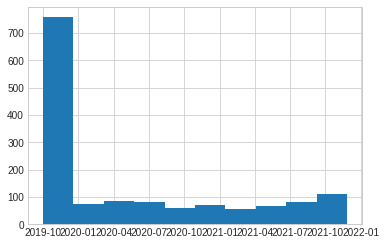

In [ ]:
# 디즈니플러스에 추가된 날짜

disney["date_added"].hist()

* **date added**는 작품이 디즈니플러스에 추가된 날짜를 의미한다.
* 2019년에 등록된 작품의 수가 압도적으로 많다.

#### 'year_added', 'month_added', 'day_added' column 추가

In [ ]:
# 'year_added', 'month_added', 'day_added' column을 새로 만들어 준다.

disney['year_added'] = disney['date_added'].dt.year
disney['month_added'] = disney['date_added'].dt.month
disney['day_added'] = disney['date_added'].dt.day

#### 연도별 작품 수 셋업

In [ ]:
# 디즈니플러스에 추가된 연도별 작품 수

d1 = disney[disney["type"] == "TV Show"]
d2 = disney[disney["type"] == "Movie"]

col = "year_added"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#9ecae1"))
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#08306b"))
data = [trace1, trace2]
layout = go.Layout(title="연도별 작품 수 증가 추이", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
#fig.show()

#### 디즈니플러스에 추가된 연도별 작품 수

In [ ]:
fig.show()

* 2019년에 디즈니 플러스가 출시되었기에 2019년에 가장 많은 업로드가 됨을 알 수 있다.


#### 월별 작품 수 셋업

In [ ]:
# 디즈니플러스에 추가된 월별 작품 수

d1 = disney[disney["type"] == "TV Show"]
d2 = disney[disney["type"] == "Movie"]

col = 'month_added'

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2 = vc2.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#9ecae1"))
trace2 = go.Bar(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#08306b"))
data = [trace1, trace2]
layout = go.Layout(title="월별 작품 수 증가 추이", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
#fig.show()

#### 디즈니플러스에 추가된 월별 작품 수

In [ ]:
fig.show()

* 넷플릭스와는 다르게 11월에 작품 업로드가 많은 것을 확인할 수 있다.
* 이는 디즈니 플러스가 2019년 11월에 서비스를 시작했기에 11월에 업로드가 몰려 있다고 추측할 수 있다.

#### 일별 작품 수 셋업

In [ ]:
# 디즈니플러스에 추가된 일별 작품 수

d1 = disney[disney["type"] == "TV Show"]
d2 = disney[disney["type"] == "Movie"]

col = 'day_added'

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2 = vc2.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#9ecae1"))
trace2 = go.Bar(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#08306b"))
data = [trace1, trace2]
layout = go.Layout(title="일별 작품 수 증가 추이", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
#fig.show()

#### 디즈니플러스에 추가된 일별 작품 수

In [ ]:
fig.show()

* 12일에 디즈니 플러스의 작품 업로드가 몰려 있음을 확인할 수 있다.
* 이는 디즈니 플러스의 서비스 시작일이 2019년 11월 12일이기 때문이다.

### 등급별

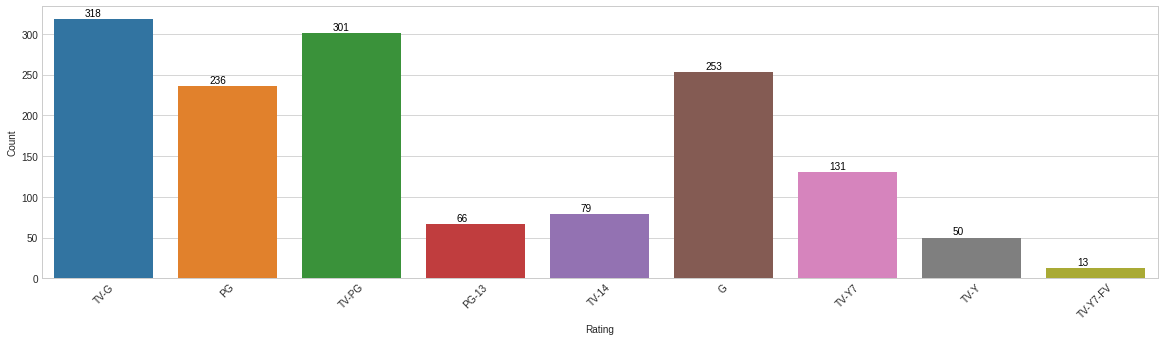

In [ ]:
plt.figure(figsize = (20, 5))
plt.style.use('seaborn-whitegrid')
ax = sns.countplot(x = 'rating', data = disney)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va = 'bottom', color = 'black')

#### 등급별 셋업(Movie & TV Show)

In [ ]:
d1 = disney[disney["type"] == "TV Show"]
d2 = disney[disney["type"] == "Movie"]

col = "rating"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#9ecae1"))
trace2 = go.Bar(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#08306b"))
data = [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
#fig.show()

#### 디즈니플러스 등급별(Movie & TV Show) 작품 수

In [ ]:
fig.show()

* G, TV-G는 **키즈(전체)** 등급
* PG, TV-PG, TV-Y7, TV-Y7-FV은 **어린이(7세 이상)** 등급
* 대체적으로 디즈니플러스의 영상 등급이 낮은 것을 알 수 있다.
* **디즈니플러스**의 **타겟층**은 <mark>어린이</mark>임을 알 수 있다.

# Netflix subscription fee

### Load Data

In [ ]:
netflix_cost.head(10)

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26
1,au,Australia,6114,4050,2064,7.84,12.12,16.39
2,at,Austria,5640,3779,1861,9.03,14.67,20.32
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99
5,br,Brazil,4972,3162,1810,4.61,7.11,9.96
6,bg,Bulgaria,6797,4819,1978,9.03,11.29,13.54
7,ca,Canada,6239,4311,1928,7.91,11.87,15.03
8,cl,Chile,4994,3156,1838,7.07,9.91,12.74
9,co,Colombia,4991,3156,1835,4.31,6.86,9.93


In [ ]:
netflix_cost.shape

(65, 8)

In [ ]:
netflix_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country_code                   65 non-null     object 
 1   Country                        65 non-null     object 
 2   Total Library Size             65 non-null     int64  
 3   No. of TV Shows                65 non-null     int64  
 4   No. of Movies                  65 non-null     int64  
 5   Cost Per Month - Basic ($)     65 non-null     float64
 6   Cost Per Month - Standard ($)  65 non-null     float64
 7   Cost Per Month - Premium ($)   65 non-null     float64
dtypes: float64(3), int64(3), object(2)
memory usage: 4.2+ KB


In [ ]:
netflix_cost.isnull().sum()

Country_code                     0
Country                          0
Total Library Size               0
No. of TV Shows                  0
No. of Movies                    0
Cost Per Month - Basic ($)       0
Cost Per Month - Standard ($)    0
Cost Per Month - Premium ($)     0
dtype: int64

In [ ]:
netflix_cost.describe()

,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,5314.415385,3518.953846,1795.461538,8.368462,11.990000,15.612923
std,980.322633,723.010556,327.279748,1.937819,2.863979,4.040672
min,2274.000000,1675.000000,373.000000,1.970000,3.000000,4.020000
25%,4948.000000,3154.000000,1628.000000,7.990000,10.710000,13.540000
50%,5195.000000,3512.000000,1841.000000,8.990000,11.490000,14.450000
75%,5952.000000,3832.000000,1980.000000,9.030000,13.540000,18.060000
max,7325.000000,5234.000000,2387.000000,12.880000,20.460000,26.960000
